In [3]:
import numpy as np
import matplotlib.pyplot as plt #Biblioteca para criar gŕaficos e visualizações

# Carregar a imagem .txt
image_array = np.loadtxt('/content/Amostra 1_0,4 Gy 2023-10-18 17h04m53.txt')

# Mostrar a imagem original
plt.figure(figsize=(6,6)) #figzise ajustar o tammanho da imagem
plt.imshow(image_array, cmap='gray') #abrir imagem como array em tom de cinza
plt.title('Imagem Original em Escala de Cinza')
plt.show()



ModuleNotFoundError: No module named 'matplotlib'

In [ ]:

#Importar bibliotecas de Fourier
from scipy.fft import fft2, ifft2, fftshift
#fft2: Calcula a Transformada de Fourier 2D de uma imagem.
#ifft2: Calcula a Transformada Inversa de Fourier 2D.
#fftshift: Desloca a origem do espectro de Fourier para o centro da imagem.
#ifftshift: Desloca a origem do espectro de Fourier de volta ao canto.

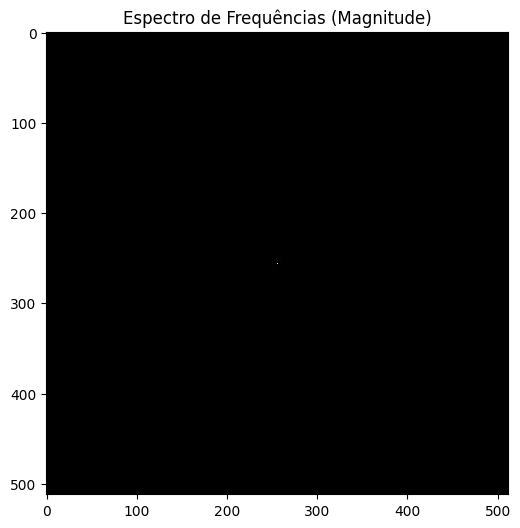

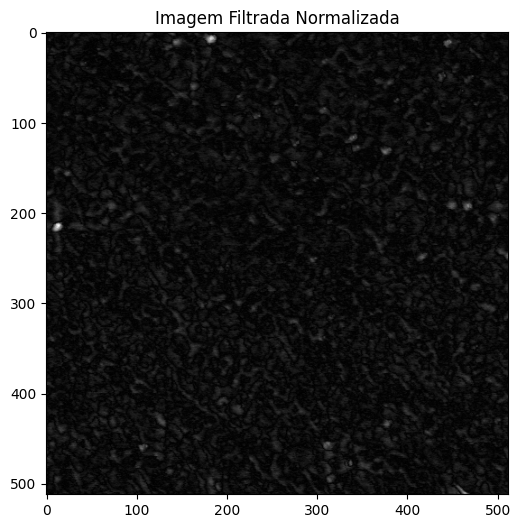

In [ ]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Aplicar a Transformada de Fourier 2D
f_transform = fft2(image_array)
f_transform_shifted = fftshift(f_transform)

# Calcular a magntide do espectro de Fourier
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Frequências (Magnitude)')
plt.show()

# Criação de uma máscara: criar uma faixa de zero nas frequências correspondentes ao ruído horizontal
# Verificar dimensões da imagem
rows, cols = image_array.shape
#Coordenadas do centro da imagem
crow, ccol = rows // 2 , cols // 2

# Ajustar a faixa da máscara
mask = np.ones((rows, cols), dtype=np.uint8)
mask[crow-5:crow+5, :] = 0  # Faixa de 10 pixels, remover frequencias horizontais

# Aplicar a máscara ao espectro de Fourier
f_transform_shifted_filtered = f_transform_shifted * mask

# Transformar de volta para o espaço da imagem
f_ishift = ifftshift(f_transform_shifted_filtered)
image_filtered = np.abs(ifft2(f_ishift))

# Normalizar a imagem filtrada para a faixa [0, 1] para melhor visualização
image_filtered_normalized = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))

# Mostrar a imagem filtrada normalizada
plt.figure(figsize=(6,6))
plt.imshow(image_filtered_normalized, cmap='gray')
plt.title('Imagem Filtrada Normalizada')
plt.show()


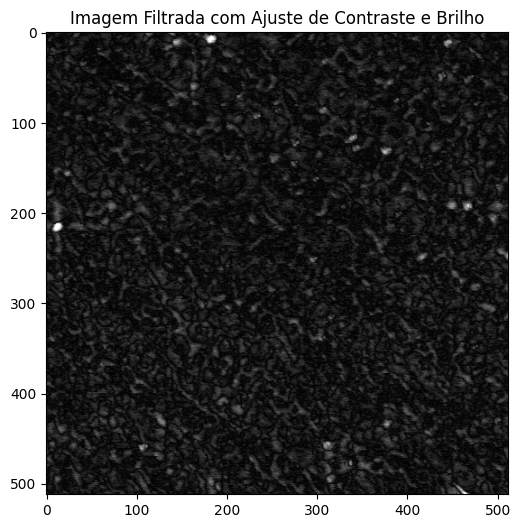

In [ ]:
def adjust_contrast_brightness(image, contrast=1.0, brightness=0.0):
    """
    Ajusta o contraste e o brilho da imagem.
    :param image: A imagem a ser ajustada.
    :param contrast: Fator de contraste (1.0 mantém o contraste original).
    :param brightness: Fator de brilho (0.0 mantém o brilho original).
    :return: A imagem ajustada.
    """
    # Ajustar contraste
    image_contrast = image * contrast
    # Ajustar brilho
    image_brightness = image_contrast + brightness

    # Garantir que os valores estejam entre 0 e 1
    image_adjusted = np.clip(image_brightness, 0, 1)

    return image_adjusted

# Ajuste do contraste e brilho da imagem filtrada
image_filtered_contrast_brightness = adjust_contrast_brightness(image_filtered_normalized, contrast=1.5, brightness=0.1)

# Mostrar a imagem com ajuste de contraste e brilho
plt.figure(figsize=(6,6))
plt.imshow(image_filtered_contrast_brightness, cmap='gray')
plt.title('Imagem Filtrada com Ajuste de Contraste e Brilho')
plt.show()


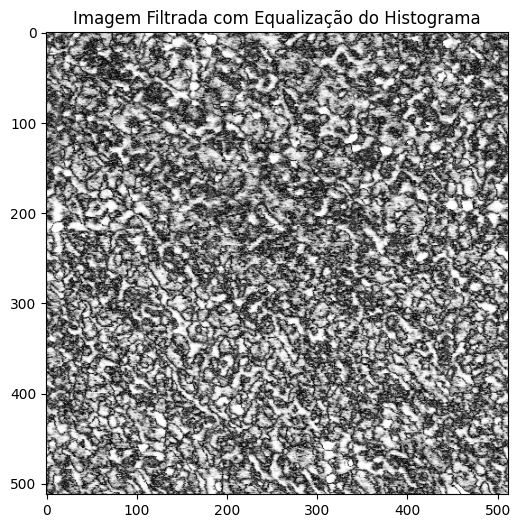

In [ ]:
from skimage import exposure

# Equalização do histograma
image_filtered_equalized = exposure.equalize_hist(image_filtered_normalized)

# Mostrar a imagem com equalização do histograma
plt.figure(figsize=(6,6))
plt.imshow(image_filtered_equalized, cmap='gray')
plt.title('Imagem Filtrada com Equalização do Histograma')
plt.show()


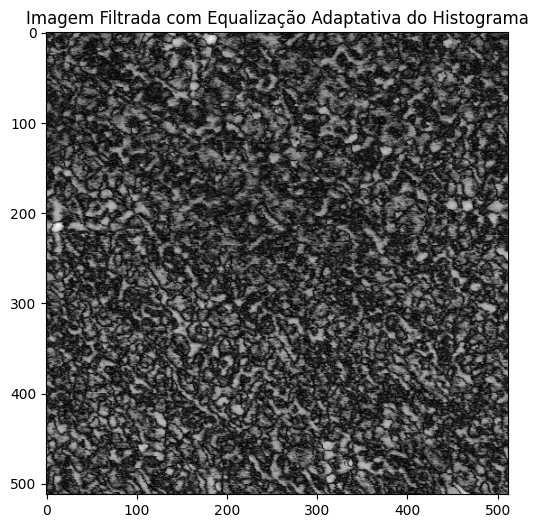

In [ ]:
from skimage import exposure

def adaptive_equalize_hist(image, clip_limit=0.01):
    """
    Aplica equalização adaptativa do histograma para melhorar a visualização.
    :param image: A imagem a ser ajustada.
    :param clip_limit: Limite de recorte para a equalização adaptativa.
    :return: A imagem ajustada.
    """
    # Equalização adaptativa do histograma (CLAHE)
    image_adaptive_equalized = exposure.equalize_adapthist(image, clip_limit=clip_limit)
    return image_adaptive_equalized

# Aplicar equalização adaptativa do histograma
image_filtered_adaptive_equalized = adaptive_equalize_hist(image_filtered_normalized, clip_limit=0.02)

# Mostrar a imagem com equalização adaptativa do histograma
plt.figure(figsize=(6,6))
plt.imshow(image_filtered_adaptive_equalized, cmap='gray')
plt.title('Imagem Filtrada com Equalização Adaptativa do Histograma')
plt.show()


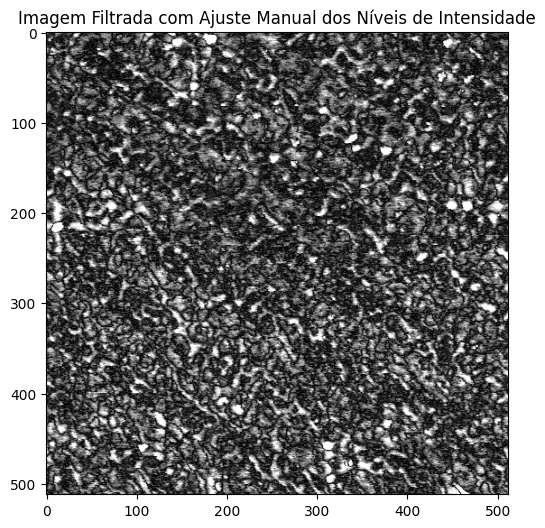

In [ ]:
def manual_adjustment(image, lower_percentile=1, upper_percentile=99):
    """
    Ajusta manualmente os níveis de intensidade da imagem.
    :param image: A imagem a ser ajustada.
    :param lower_percentile: Percentil inferior para cortar os valores de intensidade.
    :param upper_percentile: Percentil superior para cortar os valores de intensidade.
    :return: A imagem ajustada.
    """
    # Obter valores percentuais dos pixels
    p_low, p_high = np.percentile(image, [lower_percentile, upper_percentile])

    # Ajustar a imagem
    image_adjusted = np.clip((image - p_low) / (p_high - p_low), 0, 1)

    return image_adjusted

# Ajustar manualmente a imagem filtrada
image_filtered_manual_adjusted = manual_adjustment(image_filtered_normalized, lower_percentile=2, upper_percentile=98)

# Mostrar a imagem com ajuste manual dos níveis de intensidade
plt.figure(figsize=(6,6))
plt.imshow(image_filtered_manual_adjusted, cmap='gray')
plt.title('Imagem Filtrada com Ajuste Manual dos Níveis de Intensidade')
plt.show()


In [ ]:
!pip install pillow

In [ ]:
import PIL

In [ ]:
#https://pypi.org/project/pillow/

Dtype: uint8
Shape: (534, 599, 4)


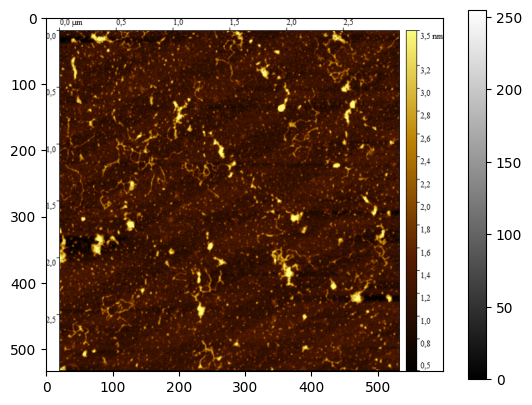

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image_path = '/content/Salay_5ng_uL_1Gy_water bath 2023-10-27 15h47m33.png'
image = Image.open(image_path)

# Converter a imagem para um array numpy
data = np.array(image)

# Verificar o tipo de dados e a forma da matriz
print(f'Dtype: {data.dtype}')
print(f'Shape: {data.shape}')

# Mostrar a imagem
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

# Exibir valores da matriz
print(data)


Preciso ajustar as escalas das imagens após transformar ela.


In [ ]:
print(image.size) #matriz Pixels

(599, 534)


In [ ]:
print(image.format) #Formato da imagem

PNG


In [ ]:
print(image.mode)

RGBA


In [ ]:
print(image.width)


599


In [ ]:
# Verificar o tipo de dados e a forma da matriz
print(f'Dtype: {data.dtype}')
print(f'Shape: {data.shape}')

Dtype: uint8
Shape: (534, 599, 4)


Cada pixel na imagem é representado por um valor inteiro que varia de 0 a 255. Isso é comum para imagens em escala de cinza ou imagens coloridas em formato RGB, onde 8 bits são suficientes para representar cada canal de cor.

R (Red): Valor que representa a intensidade da cor vermelha no pixel. Vai de 0 a 255 em uma escala de 8 bits, onde 0 é ausência de vermelho e 255 é a máxima intensidade de vermelho.

G (Green): Valor que representa a intensidade da cor verde no pixel. Também vai de 0 a 255.

B (Blue): Valor que representa a intensidade da cor azul no pixel. Vai de 0 a 255.

A (Alpha/Opacidade): Valor que representa a opacidade do pixel. Vai de 0 a 255, onde 0 é totalmente transparente e 255 é totalmente opaco.

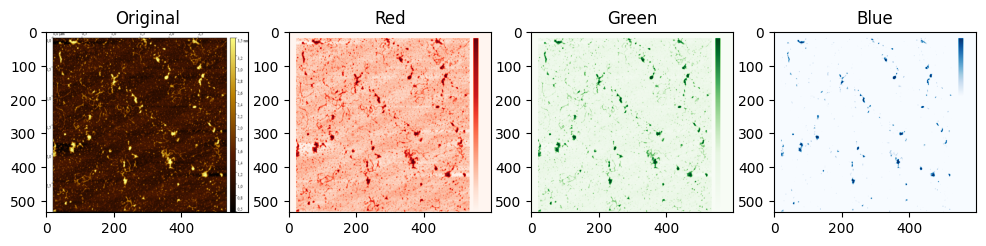

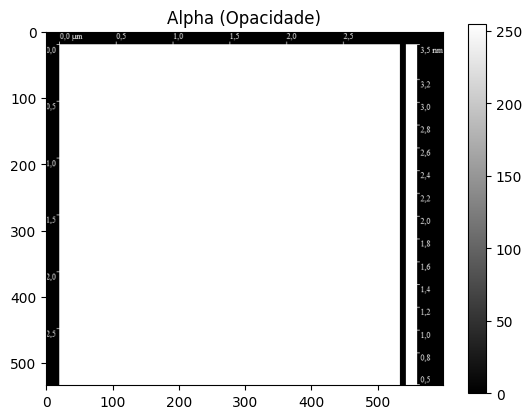

In [ ]:
# Extrair canais
r, g, b, a = data[..., 0], data[..., 1], data[..., 2], data[..., 3]

# Mostrar a imagem original
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(data)
plt.title('Original')

# Mostrar canais separados
plt.subplot(1, 4, 2)
plt.imshow(r, cmap='Reds')
plt.title('Red')

plt.subplot(1, 4, 3)
plt.imshow(g, cmap='Greens')
plt.title('Green')

plt.subplot(1, 4, 4)
plt.imshow(b, cmap='Blues')
plt.title('Blue')

plt.show()

# Mostrar o canal de alpha (opacidade)
plt.imshow(a, cmap='gray')
plt.title('Alpha (Opacidade)')
plt.colorbar()
plt.show()

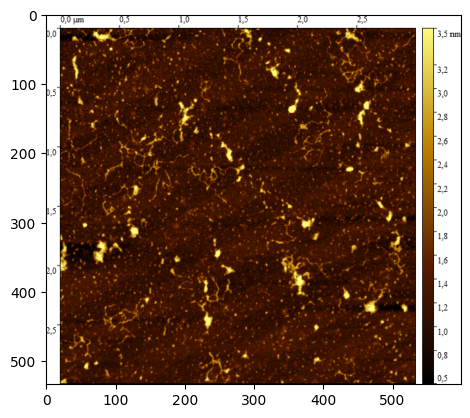

In [ ]:
# Converter para escala de cinza
gray_image = image.convert('L')

# Converter para RGB
rgb_image = image.convert('RGB')
plt.imshow(data)

Realizando um teste agora com a biblioteca OpenCv-Python. O uso de máscaras espaciais no processamento de imagens é geralmente chamado de filtragem espacial, em contraste com a filtragem no domínio da frequência, que se refere ao trabalho com a transformada de Fourier da imagem original. Essas máscaras são conhecidas como filtros espaciais. A suavização de imagens no domínio espacial utiliza máscaras de convolução apropriadas para atingir determinados objetivos, como o borramento da imagem para remover detalhes que não são relevantes para as etapas seguintes do processamento ou para eliminar ruídos. Entre as técnicas mais conhecidas de suavização estão a filtragem pela média e o filtro da mediana, cuja implementação será apresentada a seguir (GONZALES; WOODS, 2009).

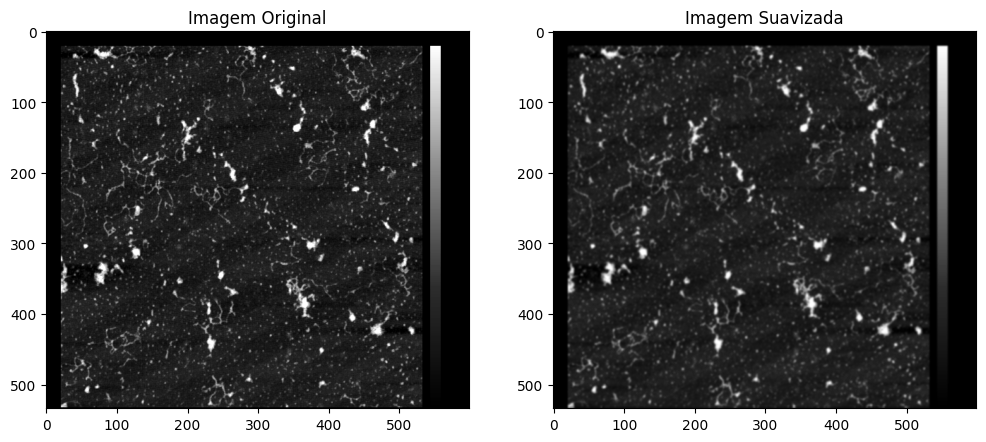

In [ ]:
import cv2 # biblioteca para processamento de imagens e visão computacional
import numpy as np
from matplotlib import pyplot as plt

# Carregar a imagem em escala de cinza
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) #paramtero para ler a imagem em escala de cinza

# Aplicar um filtro Gaussian para suavizar a imagem
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0) #matriz 5x5

# Mostrar a imagem original e a imagem suavizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) #O primeiro número é a linha, o segundo é a coluna, e o terceiro é a posição da subplot
plt.imshow(gray_image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Imagem Suavizada')
plt.show()


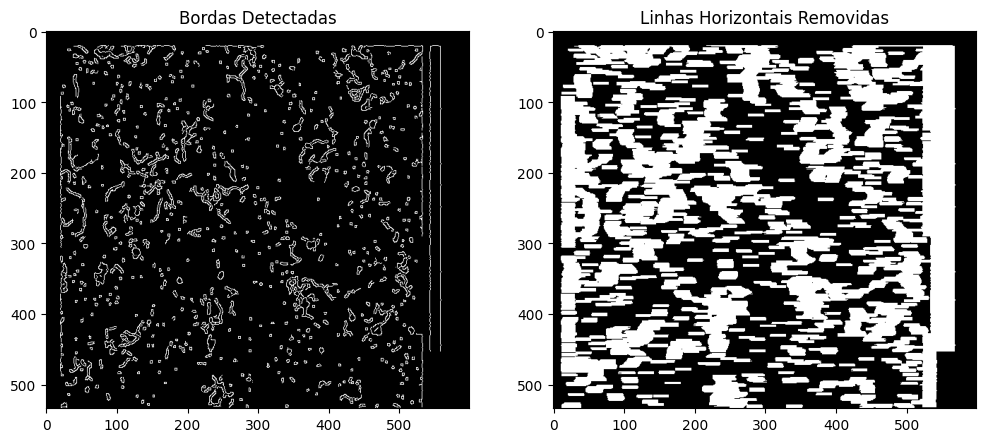

In [ ]:
#https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com
# Aplicar a detecção de bordas Canny
edges = cv2.Canny(blurred_image, 50, 150)

#Após a detecção de bordas, aplica um filtro morfológico para remover linhas horizontais usando dilatação
#Aplicar um filtro morfológico para remover linhas horizontais
kernel = np.ones((1, 20), np.uint8)  # Ajustar o tamanho do kernel
dilated = cv2.dilate(edges, kernel, iterations=1)

# Mostrar as bordas detectadas e a imagem filtrada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Bordas Detectadas')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('Linhas Horizontais Removidas')
plt.show()


O thresholding é um método de segmentação de imagem que converte uma imagem em uma imagem binária (preto e branco). A ideia é separar os pixels em duas categorias com base em um valor de limiar.

v2.THRESH_BINARY: Os pixels com valores acima do limiar são definidos como branco (255) e os pixels abaixo do limiar são definidos como preto (0). É útil para destacar objetos e separar o fundo da imagem.


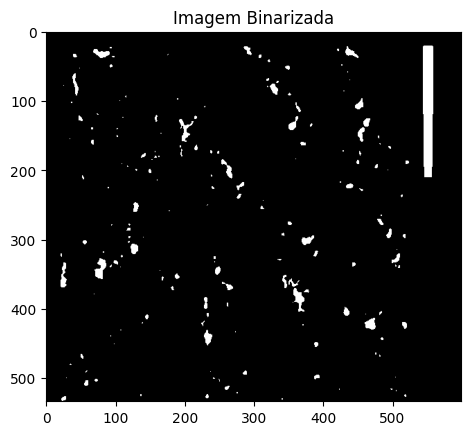

In [ ]:
# Aplicar thresholding para binarizar a imagem
_, binary_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY) #Ajustar os valores, talvez necessário aplicar com outro filtro OTSU

# Mostrar a imagem binarizada
plt.imshow(binary_image, cmap='gray')
plt.title('Imagem Binarizada')
plt.show()


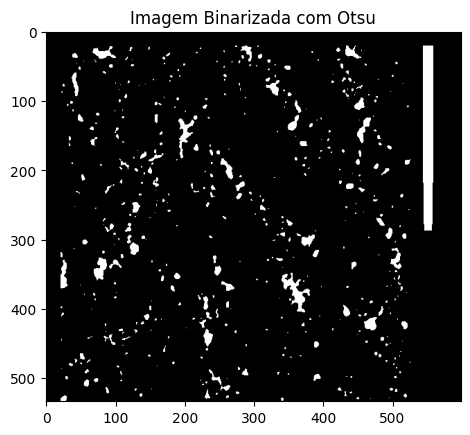

In [ ]:
# Aplicar thresholding de Otsu
_, binary_image_otsu = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar a imagem binarizada com Otsu
plt.imshow(binary_image_otsu, cmap='gray')
plt.title('Imagem Binarizada com Otsu')
plt.show()


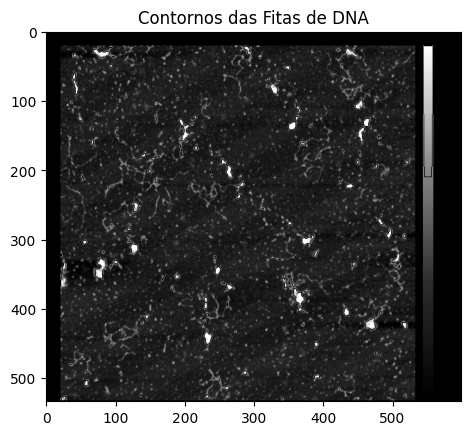

In [ ]:
# Encontrar contornos na imagem binarizada
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Desenhar os contornos na imagem original
contour_image = cv2.drawContours(gray_image.copy(), contours, -1, (0, 255, 0), 1)

# Mostrar a imagem com contornos
plt.imshow(contour_image, cmap='gray')
plt.title('Contornos das Fitas de DNA')
plt.show()


In [ ]:
# Calcular áreas e outras características dos contornos
areas = [cv2.contourArea(c) for c in contours]
print(f'Áreas dos contornos: {areas}')

# Mostrar a área total das fitas de DNA
print(f'Área total das fitas de DNA: {sum(areas)}')


Áreas dos contornos: [1.0, 26.0, 4.5, 14.5, 2.0, 1.0, 0.0, 1.5, 0.0, 20.0, 29.0, 0.0, 10.0, 1.5, 0.0, 0.0, 28.0, 0.0, 19.5, 1.5, 1.0, 1.5, 13.0, 2.0, 0.0, 24.5, 7.5, 0.0, 0.0, 131.5, 0.0, 1.0, 40.5, 0.5, 6.5, 163.5, 18.5, 0.0, 8.0, 7.5, 62.0, 4.5, 0.0, 53.0, 0.0, 15.0, 229.0, 10.0, 53.5, 42.0, 6.5, 51.0, 27.5, 0.0, 58.0, 0.0, 4.5, 1.5, 3.5, 16.5, 153.0, 0.0, 20.0, 3.0, 244.5, 6.0, 4.0, 64.5, 3.5, 1.0, 24.5, 0.0, 110.5, 2.5, 20.0, 0.0, 3.5, 122.0, 12.5, 7.5, 53.5, 12.0, 0.5, 2.5, 17.0, 34.5, 1.0, 0.0, 10.0, 0.0, 67.0, 0.0, 4.5, 20.5, 6.0, 1.0, 6.5, 45.0, 42.0, 1.0, 0.0, 5.5, 1.5, 0.0, 12.5, 2.5, 0.5, 13.5, 0.0, 14.0, 12.5, 128.5, 0.0, 0.0, 1.0, 4.0, 18.5, 6.0, 5.5, 0.0, 1.0, 6.5, 7.5, 6.5, 2.0, 19.0, 0.5, 23.5, 15.5, 0.0, 2.5, 1.5, 0.0, 0.5, 99.5, 4.0, 6.5, 181.5, 73.5, 0.0, 106.0, 9.5, 23.5, 15.5, 1.0, 0.5, 27.0, 1.0, 0.0, 91.0, 1.0, 1.0, 7.0, 0.0, 0.5, 0.0, 99.0, 4.0, 0.0, 7.0, 96.0, 0.0, 0.0, 22.0, 1.0, 9.0, 6.0, 2.5, 11.0, 0.0, 16.0, 150.5, 4.5, 2.0, 110.0, 59.0, 2435.0]
Área total 

Soma de todas as áreas individuais dos contornos listados; 6348.5. Alguns contornos sao pequenos, pode ser falha no processamento.

In [ ]:
import numpy as np

# Lista de áreas dos contornos
contour_areas = [1.0, 26.0, 4.5, 14.5, 2.0, 1.0, 0.0, 1.5, 0.0, 20.0, 29.0, 0.0, 10.0, 1.5, 0.0, 0.0, 28.0, 0.0, 19.5, 1.5, 1.0, 1.5, 13.0, 2.0, 0.0, 24.5, 7.5, 0.0, 0.0, 131.5, 0.0, 1.0, 40.5, 0.5, 6.5, 163.5, 18.5, 0.0, 8.0, 7.5, 62.0, 4.5, 0.0, 53.0, 0.0, 15.0, 229.0, 10.0, 53.5, 42.0, 6.5, 51.0, 27.5, 0.0, 58.0, 0.0, 4.5, 1.5, 3.5, 16.5, 153.0, 0.0, 20.0, 3.0, 244.5, 6.0, 4.0, 64.5, 3.5, 1.0, 24.5, 0.0, 110.5, 2.5, 20.0, 0.0, 3.5, 122.0, 12.5, 7.5, 53.5, 12.0, 0.5, 2.5, 17.0, 34.5, 1.0, 0.0, 10.0, 0.0, 67.0, 0.0, 4.5, 20.5, 6.0, 1.0, 6.5, 45.0, 42.0, 1.0, 0.0, 5.5, 1.5, 0.0, 12.5, 2.5, 0.5, 13.5, 0.0, 14.0, 12.5, 128.5, 0.0, 0.0, 1.0, 4.0, 18.5, 6.0, 5.5, 0.0, 1.0, 6.5, 7.5, 6.5, 2.0, 19.0, 0.5, 23.5, 15.5, 0.0, 2.5, 1.5, 0.0, 0.5, 99.5, 4.0, 6.5, 181.5, 73.5, 0.0, 106.0, 9.5, 23.5, 15.5, 1.0, 0.5, 27.0, 1.0, 0.0, 91.0, 1.0, 1.0, 7.0, 0.0, 0.5, 0.0, 99.0, 4.0, 0.0, 7.0, 96.0, 0.0, 0.0, 22.0, 1.0, 9.0, 6.0, 2.5, 11.0, 0.0, 16.0, 150.5, 4.5, 2.0, 110.0, 59.0, 2435.0]

# Definir um valor mínimo de área para considerar contornos significativos
min_area = 1.0

# Filtrar contornos com base no valor mínimo de área
filtered_areas = [area for area in contour_areas if area >= min_area]

# Calcular a nova área total
total_filtered_area = np.sum(filtered_areas)

print("Áreas Filtradas:", filtered_areas)
print("Área Total Filtrada:", total_filtered_area)


Áreas Filtradas: [1.0, 26.0, 4.5, 14.5, 2.0, 1.0, 1.5, 20.0, 29.0, 10.0, 1.5, 28.0, 19.5, 1.5, 1.0, 1.5, 13.0, 2.0, 24.5, 7.5, 131.5, 1.0, 40.5, 6.5, 163.5, 18.5, 8.0, 7.5, 62.0, 4.5, 53.0, 15.0, 229.0, 10.0, 53.5, 42.0, 6.5, 51.0, 27.5, 58.0, 4.5, 1.5, 3.5, 16.5, 153.0, 20.0, 3.0, 244.5, 6.0, 4.0, 64.5, 3.5, 1.0, 24.5, 110.5, 2.5, 20.0, 3.5, 122.0, 12.5, 7.5, 53.5, 12.0, 2.5, 17.0, 34.5, 1.0, 10.0, 67.0, 4.5, 20.5, 6.0, 1.0, 6.5, 45.0, 42.0, 1.0, 5.5, 1.5, 12.5, 2.5, 13.5, 14.0, 12.5, 128.5, 1.0, 4.0, 18.5, 6.0, 5.5, 1.0, 6.5, 7.5, 6.5, 2.0, 19.0, 23.5, 15.5, 2.5, 1.5, 99.5, 4.0, 6.5, 181.5, 73.5, 106.0, 9.5, 23.5, 15.5, 1.0, 27.0, 1.0, 91.0, 1.0, 1.0, 7.0, 99.0, 4.0, 7.0, 96.0, 22.0, 1.0, 9.0, 6.0, 2.5, 11.0, 16.0, 150.5, 4.5, 2.0, 110.0, 59.0, 2435.0]
Área Total Filtrada: 6345.0


In [ ]:
# Calcular estatísticas das áreas
import numpy as np

areas_np = np.array(areas)
mean_area = np.mean(areas_np)
median_area = np.median(areas_np)
std_area = np.std(areas_np)

print(f'Média das áreas: {mean_area}')
print(f'Mediana das áreas: {median_area}')
print(f'Desvio padrão das áreas: {std_area}')


Média das áreas: 35.867231638418076
Mediana das áreas: 5.5
Desvio padrão das áreas: 185.6339060134966


Há uma grande variação nas áreas dos contornos.

Média das Áreas: 35.867231638418076
Mediana das Áreas: 5.5
Desvio Padrão das Áreas: 185.6339060134966


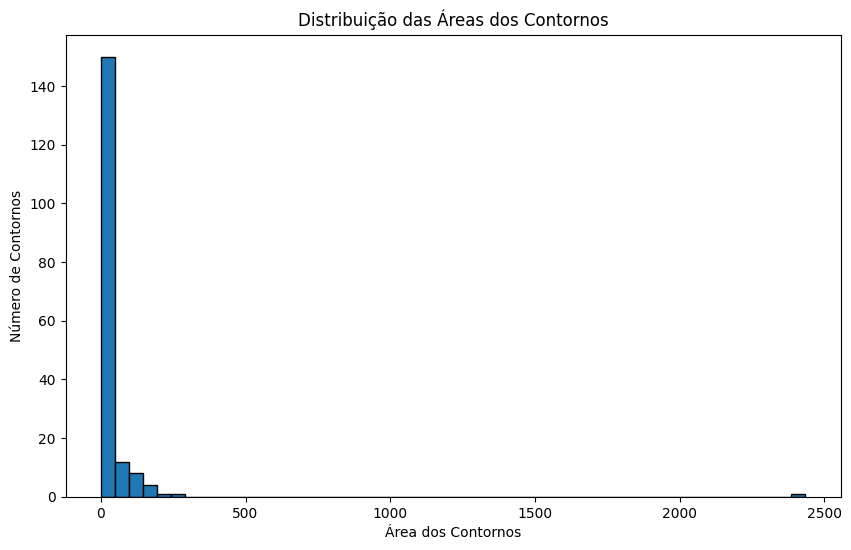

In [ ]:
import matplotlib.pyplot as plt

# Lista de áreas dos contornos
contour_areas = [1.0, 26.0, 4.5, 14.5, 2.0, 1.0, 0.0, 1.5, 0.0, 20.0, 29.0, 0.0, 10.0, 1.5, 0.0, 0.0, 28.0, 0.0, 19.5, 1.5, 1.0, 1.5, 13.0, 2.0, 0.0, 24.5, 7.5, 0.0, 0.0, 131.5, 0.0, 1.0, 40.5, 0.5, 6.5, 163.5, 18.5, 0.0, 8.0, 7.5, 62.0, 4.5, 0.0, 53.0, 0.0, 15.0, 229.0, 10.0, 53.5, 42.0, 6.5, 51.0, 27.5, 0.0, 58.0, 0.0, 4.5, 1.5, 3.5, 16.5, 153.0, 0.0, 20.0, 3.0, 244.5, 6.0, 4.0, 64.5, 3.5, 1.0, 24.5, 0.0, 110.5, 2.5, 20.0, 0.0, 3.5, 122.0, 12.5, 7.5, 53.5, 12.0, 0.5, 2.5, 17.0, 34.5, 1.0, 0.0, 10.0, 0.0, 67.0, 0.0, 4.5, 20.5, 6.0, 1.0, 6.5, 45.0, 42.0, 1.0, 0.0, 5.5, 1.5, 0.0, 12.5, 2.5, 0.5, 13.5, 0.0, 14.0, 12.5, 128.5, 0.0, 0.0, 1.0, 4.0, 18.5, 6.0, 5.5, 0.0, 1.0, 6.5, 7.5, 6.5, 2.0, 19.0, 0.5, 23.5, 15.5, 0.0, 2.5, 1.5, 0.0, 0.5, 99.5, 4.0, 6.5, 181.5, 73.5, 0.0, 106.0, 9.5, 23.5, 15.5, 1.0, 0.5, 27.0, 1.0, 0.0, 91.0, 1.0, 1.0, 7.0, 0.0, 0.5, 0.0, 99.0, 4.0, 0.0, 7.0, 96.0, 0.0, 0.0, 22.0, 1.0, 9.0, 6.0, 2.5, 11.0, 0.0, 16.0, 150.5, 4.5, 2.0, 110.0, 59.0, 2435.0]

# Calcular estatísticas
mean_area = np.mean(contour_areas)
median_area = np.median(contour_areas)
std_dev_area = np.std(contour_areas)

print(f"Média das Áreas: {mean_area}")
print(f"Mediana das Áreas: {median_area}")
print(f"Desvio Padrão das Áreas: {std_dev_area}")

# Criar histograma
plt.figure(figsize=(10, 6))
plt.hist(contour_areas, bins=50, edgecolor='black')
plt.xlabel('Área dos Contornos')
plt.ylabel('Número de Contornos')
plt.title('Distribuição das Áreas dos Contornos')
plt.show()


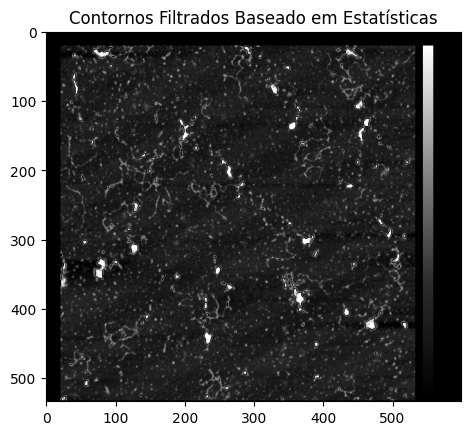

In [ ]:
# Defina limites com base na mediana e desvio padrão
lower_limit = median_area - 2 * std_area
upper_limit = median_area + 2 * std_area

# Filtrar contornos com base nos limites
filtered_contours = [c for c in contours if cv2.contourArea(c) > lower_limit and cv2.contourArea(c) < upper_limit]

# Desenhar contornos filtrados
filtered_contour_image = cv2.drawContours(gray_image.copy(), filtered_contours, -1, (0, 255, 0), 1)
plt.imshow(filtered_contour_image, cmap='gray')
plt.title('Contornos Filtrados Baseado em Estatísticas')
plt.show()


Média das áreas: 6243.65
Mediana das áreas: 0.75
Desvio padrão das áreas: 18169.01


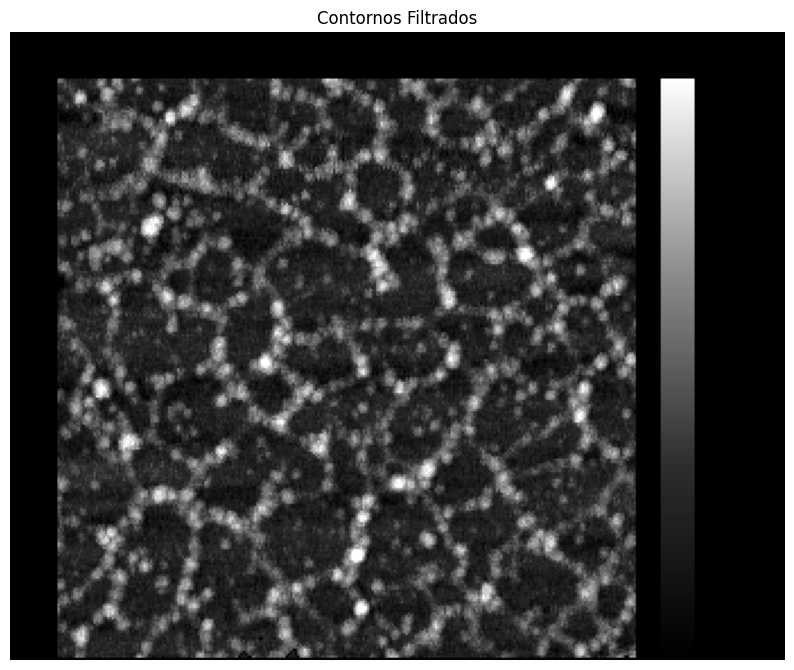

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
image_path = '/content/Amostra Test 1_sem irradiar 2023-08-23 10h49m06.png'
image = cv2.imread(image_path)

# Convertendo a imagem para escala de cinza
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar um filtro de suavização para reduzir o ruído
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Aplicar uma limiarização adaptativa para segmentar a imagem
thresh_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 11, 2)

# Encontrar contornos na imagem
contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos com base em área
contour_areas = [cv2.contourArea(c) for c in contours]

# Estatísticas das áreas
mean_area = np.mean(contour_areas)
median_area = np.median(contour_areas)
std_area = np.std(contour_areas)

print(f"Média das áreas: {mean_area:.2f}")
print(f"Mediana das áreas: {median_area:.2f}")
print(f"Desvio padrão das áreas: {std_area:.2f}")

# Definir limites com base na mediana e desvio padrão
lower_limit = median_area - 2 * std_area
upper_limit = median_area + 2 * std_area

# Filtrar contornos com base nos limites
filtered_contours = [c for c in contours if lower_limit < cv2.contourArea(c) < upper_limit]

# Criar uma imagem para desenhar os contornos filtrados
contour_image = cv2.drawContours(gray_image.copy(), filtered_contours, -1, (0, 255, 0), 1)

# Mostrar a imagem com contornos filtrados
plt.figure(figsize=(10, 10))
plt.imshow(contour_image, cmap='gray')
plt.title('Contornos Filtrados')
plt.axis('off')
plt.show()


In [ ]:
# Calcular áreas e outras características dos contornos
areas = [cv2.contourArea(c) for c in contours]
print(f'Áreas dos contornos: {areas}')

# Mostrar a área total das fitas de DNA
print(f'Área total das fitas de DNA: {sum(areas)}')

Áreas dos contornos: [0.0, 1.5, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1682.0, 60730.0]
Área total das fitas de DNA: 62436.5


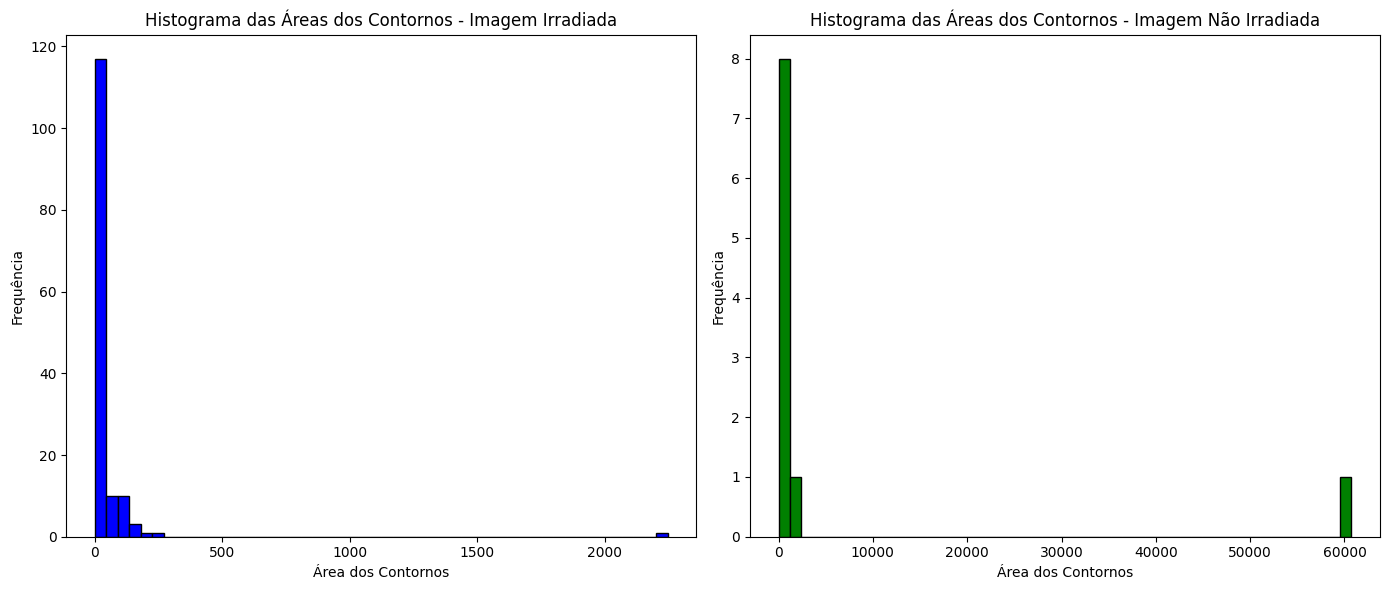

In [ ]:
import matplotlib.pyplot as plt

# Dados das áreas dos contornos
areas_irradiada = [0.5, 23.5, 2.0, 12.5, 1.5, 0.0, 0.5, 17.5, 27.0, 8.0, 0.5, 23.0, 15.5, 0.0, 0.0, 8.0, 0.5, 23.0, 6.0, 0.0, 0.0, 123.0, 0.5, 37.5, 0.0, 2.5, 156.5, 16.5, 5.0, 5.5, 56.5, 1.0, 48.0, 11.0, 219.0, 5.5, 43.5, 3.5, 0.0, 28.0, 5.0, 49.0, 25.0, 0.0, 54.5, 0.0, 2.5, 15.5, 134.0, 0.0, 17.0, 0.0, 234.5, 4.5, 3.0, 61.0, 2.5, 0.0, 22.0, 106.0, 1.5, 20.0, 1.0, 116.5, 12.0, 5.5, 51.0, 10.0, 1.5, 16.0, 34.5, 0.0, 0.0, 9.0, 60.0, 3.0, 19.0, 2.0, 0.0, 5.0, 41.5, 37.0, 2.0, 0.5, 9.5, 0.5, 11.0, 12.5, 12.0, 121.5, 3.0, 16.5, 3.5, 0.0, 5.5, 5.0, 3.5, 5.0, 15.5, 1.5, 19.5, 14.5, 1.0, 1.0, 0.0, 91.0, 0.0, 3.5, 3.5, 162.5, 70.0, 103.0, 7.5, 7.5, 21.0, 0.0, 0.0, 19.0, 1.5, 0.0, 90.0, 1.0, 0.0, 5.0, 0.0, 94.0, 3.5, 6.5, 88.0, 0.0, 21.0, 6.0, 0.0, 3.5, 1.5, 11.0, 11.0, 3.5, 142.5, 1.0, 98.5, 50.5, 2247.0]
areas_nao_irradiada = [0.0, 1.5, 9.0, 14.0, 0.0, 0.0, 0.0, 0.0, 1682.0, 60730.0]

# Plotando o histograma das áreas dos contornos
plt.figure(figsize=(14, 6))

# Histograma para a imagem irradiada
plt.subplot(1, 2, 1)
plt.hist(areas_irradiada, bins=50, color='blue', edgecolor='black')
plt.title('Histograma das Áreas dos Contornos - Imagem Irradiada')
plt.xlabel('Área dos Contornos')
plt.ylabel('Frequência')

# Histograma para a imagem não irradiada
plt.subplot(1, 2, 2)
plt.hist(areas_nao_irradiada, bins=50, color='green', edgecolor='black')
plt.title('Histograma das Áreas dos Contornos - Imagem Não Irradiada')
plt.xlabel('Área dos Contornos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


Comparação das Imagens

Imagem Irradiada:
Predomina a presença de contornos pequenos.
A distribuição mostra uma queda rápida na frequência conforme a área aumenta, com pouquíssimos contornos grandes.

Imagem Não Irradiada:
Também predomina a presença de contornos pequenos, mas existe uma distribuição diferente, com a presença de alguns contornos muito grandes (pico em torno de 60000 unidades).

A irradiação parece ter resultado em uma maior quantidade de contornos pequenos, possivelmente devido a fragmentação/mudança nas propriedades das partículas. A ausência de irradiação resulta em menos fragmentação, mas com a presença de contornos maiores, sugerindo que as partículas ou aglomerados permanecem intactos e maiores.

Spisz et al. desenvolveram um método denominado SSDS (solid-state DNA sizing) para
determinação do comprimento do DNA, visualizados em imagens de AFM [56, 57]. Este
método envolve segmentação por limiarização, esqueletização para o afinamento e depois a
somatória das distancias entre pixels conectados. Este algoritmo foi integrado ao software
AFMIPS para processar centenas de DNAs em uma imagem e mais de 1500 imagens por dia.
Sanchez-Sevilla et al. [62] aprimoraram este algoritmo calculando os comprimentos através
da filtragem gaussiana introduzida por Cesar e Costa [63], somando distâncias reais, e assim
obtendo os comprimentos de uma forma mais precisa.
Algoritmos de detecção de partı́culas e suas propriedades são muito úteis em diversos
casos. Este trabalho geralmente é feito manualmente pelo próprio usuário, o que é bastante
cansativo. Por este motivo, são desenvolvidos algoritmos que realizem esta atividade au-
tomaticamente. M. J. J. Jack et al. [58] desenvolveram um procedimento para contagem
automática de nanopartı́culas e suas áreas. Inicialmente foi feita a subtração do background
a fim de eliminar as ondulações da superfı́cie, depois foi aplicado um limiar sobre a imagem
para segmentar as partı́culas. Deste modo, informações de interesse tais como tamanho das
partı́culas e a localização são determinadas. Shane E. Roark et al. [64] também fizeram
contagem automática de partı́culas mas os pixels que definem uma partı́cula foram “fitados”
por um elipsóide ou esferóide, através do método dos mı́nimos quadrados. Após isso, as
propriedades das partı́culas foram determinadas.